In [1]:
import numpy.random as rd

PERSON_NUM = 30
VALUE_NUM = 12

person = []
for i in range(PERSON_NUM):
    value = rd.randint(low=0, high=2, size=VALUE_NUM)
    person.append(value)

In [2]:
import numpy as np

def calc_weight(a, b):
    distance = np.linalg.norm(a-b)
    weight = 1/(1+distance)
    return weight

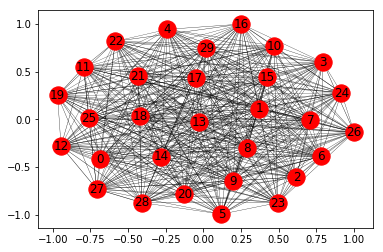

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import itertools

G = nx.Graph()

nodes_list = [i for i in range(PERSON_NUM)]
G.add_nodes_from(nodes_list)

for edge in list(itertools.combinations(nodes_list, 2)):
    G.add_path(edge, weight=calc_weight(person[edge[0]], person[edge[1]]))
    
pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)

edge_width = [ d["weight"] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edge_width)

plt.show()

In [4]:
d = nx.max_weight_matching(G)
print(d)

{(8, 6), (0, 21), (24, 17), (18, 5), (26, 29), (9, 22), (10, 12), (2, 23), (4, 13), (1, 7), (16, 14), (20, 15), (25, 3), (27, 28), (19, 11)}


In [5]:
# 選ばれたエッジ
matching_group = d
# 上限に達したノード
selected_nodes = set()

In [6]:
def reMatching(matching_group, d, selected_nodes):
    
    # 選ばれたエッジを削除
    G.remove_edges_from(d)
    
    # 上限に達したノードの更新
    for group in matching_group:
        if len(group) == 4:
            selected_nodes = selected_nodes | set(group)
    
    # 上限に達したノードを削除
    G.remove_nodes_from(selected_nodes)

    # 再度最大流マッチングを実行
    d = nx.max_weight_matching(G)

    for dd in d:
        i, j = dd
        i_group = tuple({i})
        j_group = tuple({j})

        for group in matching_group:
            if i in group:
                i_group = group
            if j in group:
                j_group = group

        new_group = tuple(set(i_group) | set(j_group))
        
        if len(new_group) <= 4:

            matching_group.add(new_group)
            matching_group.discard(i_group)
            matching_group.discard(j_group)
    
    return matching_group, d, selected_nodes

In [7]:
import time
start = time.time()

In [8]:
while len(d) > 0:
    matching_group, d, selected_nodes = reMatching(matching_group, d, selected_nodes)
print(matching_group)
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

{(8, 27, 28, 6), (9, 4, 13, 22), (0, 1, 21, 7), (16, 20, 14, 15), (19, 10, 11, 12), (2, 23), (25, 26, 3, 29), (24, 17, 18, 5)}
elapsed_time:0.033833980560302734[sec]
